### Example `tutorials/load_data/images`

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [29]:
import sys
[item for item in sys.modules.keys() if 'tensorflow' in item]

['tensorflow.python.platform',
 'tensorflow.python.platform.build_info',
 'tensorflow.python.platform.self_check',
 'tensorflow.python.pywrap_dlopen_global_flags',
 'tensorflow.python._pywrap_tensorflow_internal',
 'tensorflow.python.pywrap_tensorflow',
 'tensorflow.python.eager',
 'tensorflow.core',
 'tensorflow.core.framework',
 'tensorflow.core.framework.tensor_shape_pb2',
 'tensorflow.core.framework.types_pb2',
 'tensorflow.core.framework.resource_handle_pb2',
 'tensorflow.core.framework.tensor_pb2',
 'tensorflow.core.framework.attr_value_pb2',
 'tensorflow.core.framework.node_def_pb2',
 'tensorflow.core.framework.op_def_pb2',
 'tensorflow.core.framework.function_pb2',
 'tensorflow.core.protobuf',
 'tensorflow.core.framework.cost_graph_pb2',
 'tensorflow.core.framework.versions_pb2',
 'tensorflow.core.framework.graph_pb2',
 'tensorflow.core.framework.allocation_description_pb2',
 'tensorflow.core.framework.tensor_description_pb2',
 'tensorflow.core.framework.step_stats_pb2',
 'tens

In [2]:
print(tf.__version__)

2.4.0


### <ins> Download and untar dataset from url </ins>

In [3]:
# Download the flowers dataset

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file(origin=dataset_url,
#                                    fname='flower_photos',
#                                    untar=True)

In [4]:
import pathlib
#import os

data_dir = r'D:\DATASETS\Flowers\flower_photos'  # remember to add 'r' for raw string!!!!!!!!!!!!!!!!
#data_dir = os.path.normpath(data_dir)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/DATASETS/Flowers/flower_photos')

### <ins> Number of images in directory </ins>

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


### <ins> View an image from directory </ins>

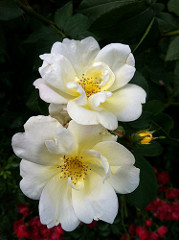

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

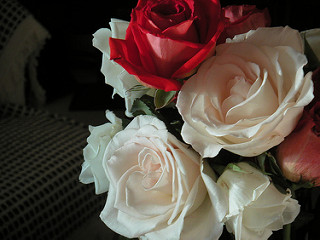

In [7]:
PIL.Image.open(str(roses[1]))

## (1) tf.keras.utils.image_dataset_from_directory

(https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)

Generates a tf.data.Dataset from image files in a directory.

**Comments:**
- should specify `image_size`: Size to resize images to after they are read from disk. Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.
- `interpolation`: String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.
- `crop_to_aspect_ratio`: 	If True, resize the images without aspect ratio distortion. When the original aspect ratio differs from the target aspect ratio, the output image will be cropped so as to return the largest possible window in the image (of size image_size) that matches the target aspect ratio. By default (crop_to_aspect_ratio=False), aspect ratio may not be preserved.
- `color_mode`: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
- `label_mode`: 
    - 'int': means that the labels are encoded as integers (e.g. for `sparse_categorical_crossentropy` loss). 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
    - None (no labels).
- `validation_split`: we could use this to set a valid set. Hence the original folder should contain all images
- `subset` (**Not sure!**): One of "training" or "validation". Only used if validation_split is set. Maybe this is used to control which dataset to load? Should we split images in separate folders (train validation or not????).
- `follow_links`: Whether to visits subdirectories pointed to by symlinks. Defaults to False

Returns: A tf.data.Dataset object. It yields float32 tensors (batch_size, image_size[0], image_size[1], num_channels) If label_mode is None, Otherwise, it yields a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels), and labels follows the format below.

- if label_mode is int, the labels are an int32 tensor of shape (batch_size,).
- if label_mode is binary, the labels are a float32 tensor of 1s and 0s of shape (batch_size, 1).
- if label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
elem = train_ds.take(1)  #Tuple of  ( (X batch), (y batch) )
elem

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

### .take(1) return a BATCH of images=tf.Tensor (batch, ht, wd, ch) together with their labels (batch,0)

In [13]:
for images, labels in train_ds.take(1):
    print(images.shape, labels.shape)

(32, 180, 180, 3) (32,)


In [14]:
for images, labels in train_ds.take(1):
    print(images.shape, labels.shape)
    #print(images) #tf.Tensor(32, 180, 180, 3)
    print('labels=', labels) #tf.Tensor(32,)
    print('labels.shape=',labels.shape) #(32,)
    print('labels.shape[0]=',labels.shape[0]) #32 integer
    
    print('printing first 3 images and labels')
    for i in range(labels.shape[0]):
        print(images[i].shape , '(tf.tensor) -->', labels[i])
        print('X.numpy()=', images[i].numpy())
        print('y.numpy()=', labels[i].numpy())
        #print(f'tf.tensor({images[i].shape}) --> {labels[i]}')
        
        print('-'*40)
        
        #uint8 = Unsigned Integers of 8 bits. A uint8 data type contains all whole numbers from 0 to 255.
        print('X.numpy().astype("uint8")=', images[i].numpy().astype("uint8"))
        print('y.numpy().astype("uint8")=', labels[i].numpy().astype("uint8"))
        
        if i==0:
            break

(32, 180, 180, 3) (32,)
labels= tf.Tensor([3 3 4 4 1 3 4 3 4 4 1 3 0 0 2 4 1 3 1 1 1 3 1 2 1 3 4 1 4 4 4 3], shape=(32,), dtype=int32)
labels.shape= (32,)
labels.shape[0]= 32
printing first 3 images and labels
(180, 180, 3) (tf.tensor) --> tf.Tensor(3, shape=(), dtype=int32)
X.numpy()= [[[ 88.388885  124.388885  200.38889  ]
  [ 88.92778   124.92778   200.92778  ]
  [ 88.83426   125.369446  199.21297  ]
  ...
  [214.58002    86.53922     0.2936081]
  [233.40553   102.67497     5.1722207]
  [228.70369    97.68517     2.5083113]]

 [[ 90.27778   126.27778   202.27779  ]
  [ 90.86666   127.15      203.00833  ]
  [ 95.05278   133.0361    206.15555  ]
  ...
  [161.44464    69.41103     9.163834 ]
  [172.70831    64.72499     1.3749433]
  [153.86942    63.70556     4.155579 ]]

 [[ 93.02778   131.02779   206.02779  ]
  [ 92.75      130.81944   205.81944  ]
  [ 98.35185   137.16203   209.87962  ]
  ...
  [118.51407    59.675957    8.26374  ]
  [167.69492   102.569954   42.9172   ]
  [226.2223

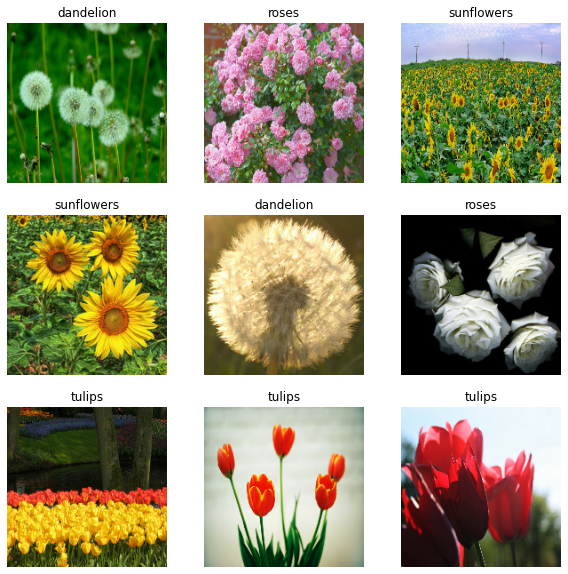

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Standardize the data

### `map` Example on a real dataset

In [ ]:
#!pip install keras-preprocessing

# Replace keras.engine
# with tensorflow.python.keras.engine

In [19]:
import tensorflow as tf

# from keras.engine import base_layer
# from keras.engine import base_preprocessing_layer

from tensorflow.python.keras.engine import base_layer
from tensorflow.python.keras.engine import base_preprocessing_layer

In [20]:
from tensorflow.python.keras.layers import Rescaling

normalization_layer = Rescaling(1./255) # [0,1] normalization
#normalization_layer = Rescaling(1./127.5, offset=-1)  # [-1,1] normalization

#normalization_layer = tf.keras.layers.Rescaling(1./255)
#tf.keras.layers.Rescaling(1./127.5, offset=-1)  # [-1,1] normalization

In [21]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [22]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [24]:
train_ds.take(1)

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [25]:
for i in train_ds.take(1):
    print(i)

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[5.10956764e-01, 2.19382715e+00, 5.82715988e-01],
         [0.00000000e+00, 3.31666684e+00, 1.66620362e+00],
         [1.57932138e+00, 4.98333311e+00, 2.59243822e+00],
         ...,
         [8.99089241e+00, 3.19908924e+01, 4.10203743e+00],
         [8.00276756e+00, 3.01694241e+01, 6.66945457e+00],
         [6.36157227e+00, 2.80611076e+01, 5.16126251e+00]],

        [[3.82407337e-01, 8.79953575e+00, 1.13129616e+01],
         [4.26111031e+00, 1.53805542e+01, 2.09013863e+01],
         [6.82870245e+00, 1.87953682e+01, 2.47120342e+01],
         ...,
         [8.45276070e+00, 3.14527607e+01, 4.49259281e+00],
         [7.49444437e+00, 2.84319191e+01, 5.34167671e+00],
         [5.81250191e+00, 2.54055519e+01, 3.20786881e+00]],

        [[5.96759224e+00, 2.12052460e+01, 3.55401230e+01],
         [2.17777786e+01, 3.65972214e+01, 5.57638855e+01],
         [3.49668236e+01, 4.97862701e+01, 7.06195984e+01],
         ...,
         

In [27]:
def map_fn(x,y):
    return x/255.0 , y

In [28]:
normalized_ds_tr = train_ds.map(lambda x, y:(normalization_layer(x), y))
normalized_ds_val = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [30]:
for i in normalized_ds_tr.take(1):
    print(i)

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [9.89564359e-01, 9.85642791e-01, 9.05544758e-01],
         [9.90326881e-01, 9.86405313e-01, 9.12483752e-01],
         [9.91078496e-01, 9.87156928e-01, 9.13235366e-01]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [9.92756009e-01, 9.88714635e-01, 9.03725505e-01],
         [9.97026145e-01, 9.90130663e-01, 9.03725505e-01],
         [9.97843206e-01, 9.92527366e-01, 9.02331293e-01]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         

### `ImageDataGenerator`  (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

https://www.tensorflow.org/guide/data

In [31]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [32]:
flowers = 'D://DATASETS/Flowers/flower_photos/'

images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [33]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [34]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [35]:
for images, label in ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


### Consuming text data + Interleave

see https://www.tensorflow.org/tutorials/load_data/text
    
and https://www.tensorflow.org/guide/data#consuming_text_data

and

In [38]:
file_paths = ['../text1.txt','../text2.txt','../text3.txt','../text4.txt']

dataset = tf.data.TextLineDataset(file_paths)

for line in dataset.take(9):
      print(line.numpy())

b'Hello'
b'Bonjour'
b'Kalhmera'
b'Conichua'
b'Theo'
b'Georgia'
b'Koni'
b'Mariana'
b'Thank you'


To alternate lines between files use `Dataset.interleave`. This makes it easier to shuffle files together. Here are the first, second and third lines from each translation:

In [52]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=4, block_length=1)

for i, line in enumerate(lines_ds.take(16)):
  if i % 4 == 0:
    print()
  print(line.numpy())


b'Hello'
b'Theo'
b'Thank you'
b'very much'

b'Bonjour'
b'Georgia'
b'excsume'
b'moi'

b'Kalhmera'
b'Koni'
b'Euxaristw'
b'para poly'

b'Conichua'
b'Mariana'
b'Arigato'
b'gozaimas'


In [59]:
titanic_file = tf.keras.utils.get_file("train_titanic.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [60]:
for line in titanic_lines.take(10):
    print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [64]:
def survived(line):
    '''
    This is a predicate. It is a function that maps a dataset element
    to a boolean.
    '''
    return tf.not_equal(tf.strings.substr(line, 0, 1), "0")

In [61]:
line_eg = b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'

In [62]:
tf.strings.substr(line_eg, 0, 1)

<tf.Tensor: shape=(), dtype=string, numpy=b'0'>

In [63]:
tf.not_equal(tf.strings.substr(line_eg, 0, 1), "0")

<tf.Tensor: shape=(), dtype=bool, numpy=False>

Here, you skip the first line, then filter to find only survivors.

In [66]:
survivors = titanic_lines.skip(1).filter(survived)

In [67]:
for line in survivors.take(10):
    print(line.numpy())

b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'
b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y'
b'1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y'
b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n'


### Reading data from files via TFRecordDataset, CsvDataset, etc. is the most effective way to consume data, as then TensorFlow itself can manage the asynchronous loading and prefetching of data, without having to involve Python. To learn more, see the tf.data: Build TensorFlow input pipelines guide. (https://www.tensorflow.org/guide/data)

### Loading CSV data

## `tf.data.TFRecordDataset`

https://www.srijan.net/resources/blog/building-a-high-performance-data-pipeline-with-tensorflow

Using tf.data.TFRecordDataset :

The tf.data API provides another method tf.data.TFRecordDataset, which can be used to consume any amount of data in a most efficient way as a tf.data.Dataset object. tf.data.TFRecordDataset is a record-oriented binary format which is optimized for high throughput data retrieval and can be used for consuming any data format. We can use tf.data.TFRecordDataset class to build a streaming input pipeline that can stream over the content of one or more TFRecord files.

Tensorflow recommends to serialize and store any dataset like CSVs, Images, Texts, etc., into a set of TFRecord files, each having a maximum size of around 100-200MB. In order to do so, we have to create a writer function using TFRecordWriter that will take any data, make it serializable and write it into TFRecord format.

To get the data back in original format during the training time, we will create another reader function which will take the written TFRecord files and convert them back into their original form.

Now for serializability, there are two options:

Using tf.Example in case of scalar features
Using tf.serialize_tensor in case of non-scalar features
Let’s look at the below steps to get a good understanding on how to achieve this.

Step 1: Importing required libraries and creating our sample data 

##  `.from_tensor_slices` <ins> tf.data.Dataset.from_tensor_slices(tensors) </ins>


### `from_tensor_slices` creates a dataset with a separate element for each row of the input tensor:

### If all of your input data fits in memory, the simplest way to create a Dataset from them is to convert them to tf.Tensor objects and use Dataset.from_tensor_slices().

Creates a Dataset whose elements are slices of the given tensors.

The given tensors are sliced along their first dimension. This operation preserves the structure of the input tensors, removing the first dimension of each tensor and using it as the dataset dimension. All input tensors must have the same size in their first dimensions.

In [77]:
def print_elements(dataset):
    for i in dataset:
        print(i)
        print('-'*50)

In [78]:
# Slicing a 1D tensor produces scalar tensor elements. 
# (3,) -> remove 1st dim as dataset dim -> (3,)
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])

dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [79]:
print_elements(dataset)

tf.Tensor(1, shape=(), dtype=int32)
--------------------------------------------------
tf.Tensor(2, shape=(), dtype=int32)
--------------------------------------------------
tf.Tensor(3, shape=(), dtype=int32)
--------------------------------------------------


### `batch` dataset.batch(num)

In [80]:
data_batch = dataset.batch(2)
data_batch

<BatchDataset shapes: (None,), types: tf.int32>

In [81]:
print_elements(data_batch)

tf.Tensor([1 2], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([3], shape=(1,), dtype=int32)
--------------------------------------------------


### Convert dataset into numpy iterator

In [82]:
it = dataset.as_numpy_iterator()
it

In [83]:
for i in it:
    print(i)

1
2
3


In [84]:
for i in it:
    print(i)

In [85]:
it = dataset.as_numpy_iterator()
next(it), next(it), next(it)

(1, 2, 3)

In [58]:
next(it)

StopIteration: 

In [94]:
np.array([[1, 2], [3, 4], [5, 6], [7,8], [9,10]]).shape

(5, 2)

In [96]:
np.array([1, 2, 4]).shape

(3,)

In [86]:
# Slicing a 2D tensor produces 1D tensor elements.
# (5,2) -> 1st dim is dataset dim and will be removed -> (2,) each element and have 5 elements
dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4], [5, 6], [7,8], [9,10]])
dataset

<TensorSliceDataset shapes: (2,), types: tf.int32>

In [87]:
print_elements(dataset)

tf.Tensor([1 2], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([3 4], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([5 6], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([7 8], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([ 9 10], shape=(2,), dtype=int32)
--------------------------------------------------


In [88]:
batched_dataset = dataset.batch(2)
print_elements(batched_dataset)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
--------------------------------------------------
tf.Tensor(
[[5 6]
 [7 8]], shape=(2, 2), dtype=int32)
--------------------------------------------------
tf.Tensor([[ 9 10]], shape=(1, 2), dtype=int32)
--------------------------------------------------


In [89]:
# Slicing a tuple of 1D tensors produces tuple elements containing scalar tensors.
dataset = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))

print_elements(dataset)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)
--------------------------------------------------
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=6>)
--------------------------------------------------


In [103]:
# Slicing a tuple of 1D tensors produces tuple elements containing scalar tensors.
dataset = tf.data.Dataset.from_tensor_slices(([1, 2,3,4], [5, 6,7,8]))

print_elements(dataset)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)
--------------------------------------------------
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=6>)
--------------------------------------------------
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=7>)
--------------------------------------------------
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=8>)
--------------------------------------------------


In [90]:
# Dictionary structure is also preserved.
dataset = tf.data.Dataset.from_tensor_slices({"a": [1, 2], "b": [3, 4], "c":[5,6], "d":[7,8]})

print_elements(dataset)

{'a': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'b': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'c': <tf.Tensor: shape=(), dtype=int32, numpy=5>, 'd': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
--------------------------------------------------
{'a': <tf.Tensor: shape=(), dtype=int32, numpy=2>, 'b': <tf.Tensor: shape=(), dtype=int32, numpy=4>, 'c': <tf.Tensor: shape=(), dtype=int32, numpy=6>, 'd': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
--------------------------------------------------


In [92]:
# Two tensors can be combined into one Dataset object

features = tf.constant([[1, 3], [2, 1], [3, 3]]) # ==> 3x2 tensor
labels = tf.constant(['A', 'B', 'A']) # ==> 3x1 tensor

dataset = tf.data.Dataset.from_tensor_slices((features, labels))

print_elements(dataset)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 1])>, <tf.Tensor: shape=(), dtype=string, numpy=b'B'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------


In [93]:
it = dataset.as_numpy_iterator()
print_elements(it)

(array([1, 3]), b'A')
--------------------------------------------------
(array([2, 1]), b'B')
--------------------------------------------------
(array([3, 3]), b'A')
--------------------------------------------------


In [100]:
# Both the features and the labels tensors can be converted to a Dataset object 
# separately and combined after.

features_dataset = tf.data.Dataset.from_tensor_slices(features)
print_elements(features_dataset)

print('X'*50)

labels_dataset = tf.data.Dataset.from_tensor_slices(labels)
print_elements(labels_dataset)

tf.Tensor([1 3], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([2 1], shape=(2,), dtype=int32)
--------------------------------------------------
tf.Tensor([3 3], shape=(2,), dtype=int32)
--------------------------------------------------
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
tf.Tensor(b'A', shape=(), dtype=string)
--------------------------------------------------
tf.Tensor(b'B', shape=(), dtype=string)
--------------------------------------------------
tf.Tensor(b'A', shape=(), dtype=string)
--------------------------------------------------


### `zip` tf.data.Dataset.zip

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip

In [104]:
dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))
print_elements(dataset)                            

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 1])>, <tf.Tensor: shape=(), dtype=string, numpy=b'B'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------


In [107]:
dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))
print_elements(dataset)   

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 1])>, <tf.Tensor: shape=(), dtype=string, numpy=b'B'>)
--------------------------------------------------
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>, <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)
--------------------------------------------------


In [ ]:
# A batched feature and label set can be converted to a Dataset
# in similar fashion.

In [177]:
batched_features = tf.constant([[[1, 3], [2, 3]],
                                [[2, 1], [1, 2]],
                                [[3, 3], [3, 2]]], shape=(3, 2, 2))
batched_labels = tf.constant([['A', 'A'],
                              ['B', 'B'],
                              ['A', 'B']], shape=(3, 2, 1))
dataset = tf.data.Dataset.from_tensor_slices((batched_features, batched_labels))
for element in dataset.as_numpy_iterator():
    print(element)

(array([[1, 3],
       [2, 3]]), array([[b'A'],
       [b'A']], dtype=object))
(array([[2, 1],
       [1, 2]]), array([[b'B'],
       [b'B']], dtype=object))
(array([[3, 3],
       [3, 2]]), array([[b'A'],
       [b'B']], dtype=object))


Note that if tensors contains a NumPy array, and eager execution is not enabled, the values will be embedded in the graph as one or more tf.constant operations. For large datasets (> 1 GB), this can waste memory and run into byte limits of graph serialization. If tensors contains one or more large NumPy arrays, consider the alternative described in this guide

In [148]:
## Passing a dictionary
dataset = tf.data.Dataset.from_tensor_slices({"a": [1, 2, 3, 4], 
                                              "b": [5, 6, 7, 8], 
                                              "c": [9, 10, 11, 12]})
list(dataset.as_numpy_iterator())

[{'a': 1, 'b': 5, 'c': 9},
 {'a': 2, 'b': 6, 'c': 10},
 {'a': 3, 'b': 7, 'c': 11},
 {'a': 4, 'b': 8, 'c': 12}]

In [130]:
import pandas as pd

df = pd.DataFrame({
    "name" : ["Theo", "Georgia", "Koni", "Mariana"],
    "age" : [33, 28, 30, 30],
    "score" : [9.2, 8.8, 9.1, 8.6]
})

df

,name,age,score
0,Theo,33,9.2
1,Georgia,28,8.8
2,Koni,30,9.1
3,Mariana,30,8.6


In [144]:
dict_df # is a dictionary with keys: strings and values pandas series

{'name': 0       Theo
 1    Georgia
 2       Koni
 3    Mariana
 Name: name, dtype: object,
 'age': 0    33
 1    28
 2    30
 3    30
 Name: age, dtype: int64,
 'score': 0    9.2
 1    8.8
 2    9.1
 3    8.6
 Name: score, dtype: float64}

In [132]:
dict_df = dict(df)
dict_df.keys()

dict_keys(['name', 'age', 'score'])

In [134]:
dict_df.values()

dict_values([0       Theo
1    Georgia
2       Koni
3    Mariana
Name: name, dtype: object, 0    33
1    28
2    30
3    30
Name: age, dtype: int64, 0    9.2
1    8.8
2    9.1
3    8.6
Name: score, dtype: float64])

In [136]:
dict_df['name']

0       Theo
1    Georgia
2       Koni
3    Mariana
Name: name, dtype: object

In [140]:
dict_df['age']

0    33
1    28
2    30
3    30
Name: age, dtype: int64

In [141]:
dict_df['score']

0    9.2
1    8.8
2    9.1
3    8.6
Name: score, dtype: float64

In [137]:
type(dict_df['name'])

pandas.core.series.Series

In [149]:

# dict(df) is a dictionary with keys: strings and values pandas series
dataset = tf.data.Dataset.from_tensor_slices(dict(df))
list(dataset.as_numpy_iterator())

[{'name': b'Theo', 'age': 33, 'score': 9.2},
 {'name': b'Georgia', 'age': 28, 'score': 8.8},
 {'name': b'Koni', 'age': 30, 'score': 9.1},
 {'name': b'Mariana', 'age': 30, 'score': 8.6}]

### PROS and CONS on `from_tensor_slices`

`Pros:`

- Easy to use
- Recommended for small datasets (size <1GB)

`Cons:`

- Not efficient when dealing with huge amounts of data. **If all of your input data fits in memory**, the simplest way to create a Dataset from them is to convert them to tf.Tensor objects and use Dataset.from_tensor_slices().
- Before consuming, data needs to be loaded inside memory, which may lead to OOM (out of memory) error in case of large datasets.
- Lots of memory wastage, may run into the 2GB limit for tf.GraphDef protocol buffer.

## SUMMARY

- [1, 2, 3] $\,\,\,\,\,\,\,\,\,$  $\rightarrow$  1, 2, 3
- [[1, 2], [3, 4]] $\rightarrow$ [1,2] , [3,4]
- ([1, 2], [3, 4], [5, 6]) $\rightarrow$ (1,3,5), (2,4,6)
- ([1, 2,3,4], [5, 6,7,8]) $\rightarrow$  (1,5), (2,6), (3,7), (4,8)
- (tf.constant([[1,2], [3,4], [5,6]])   ,  tf.constant(['A', 'B', 'C'])) $\rightarrow$ ([1,2], 'A'), ([3,4], 'B'), ([5,6], 'C')

- dict{"a":[1,2,3], "b":[4,5,6]}  $\rightarrow$ {"a":1,"b":4} , {"a":2,"b":5} , {"a":3,"b":6}


## VERY GOOD RESOURCES !!!

Most efficient way to load data <br>
- https://stackoverflow.com/questions/68594188/what-is-the-best-way-to-load-data-with-tf-data-dataset-in-memory-efficient-way


Comparison of different approaches <br>
- https://www.srijan.net/resources/blog/building-a-high-performance-data-pipeline-with-tensorflow

- https://stackoverflow.com/questions/47086599/parallelising-tf-data-dataset-from-generator

### <ins> tf.data.Dataset.from_generator.from_generator(generator, output_signature) </ins>

Creates a Dataset whose elements are generated by generator

The generator argument must be a callable object that returns an object that supports the iter() protocol (e.g. a generator function).

The elements generated by generator must be compatible with the given output_signature argument

The current implementation of Dataset.from_generator() uses tf.numpy_function and inherits the same constraints. In particular, it requires the dataset and iterator related operations to be placed on a device in the same process as the Python program that called Dataset.from_generator(). The body of generator will not be serialized in a GraphDef, and **you should NOT use this method if you need to serialize your model and restore it in a different environment.!!!**

**generator:** A generator is a special type of function which does not return a single value, instead, it returns an iterator object with a sequence of values. In a generator function, a yield statement is used rather than a return statement.

The difference between yield and return is that yield returns a value and pauses the execution while maintaining the internal states, whereas the return statement returns a value and terminates the execution of the function

**generators return an iterator object!!**

`Pros:`

- Simple, flexible and easy to use due to pure pythonic notations.
- Memory efficient

`Cons:`

- Limited portability and scalability as a python based generator will be running in the same python process due to GIL lock.

### <ins> tf.data.experimental.make_csv_dataset </ins>

https://www.srijan.net/resources/blog/building-a-high-performance-data-pipeline-with-tensorflow


https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset

**Pros:**

- Easy to use
- Works much better for both small as well as large datasets.

**Cons:**

- Still an experimental module

### <ins> tf.data.Dataset.list_files(file_pattern, shuffle=None, seed=None) </ins>

To create a dataset of all files matching a pattern, use tf.data.Dataset.list_files:

### Ways to load dataset

### https://www.srijan.net/resources/blog/building-a-high-performance-data-pipeline-with-tensorflow


### Difference between `from_tensors` and `from_tensor_slices`
### https://stackoverflow.com/questions/49579684/what-is-the-difference-between-dataset-from-tensors-and-dataset-from-tensor-slic

### <ins> Apply transformations to the dataset </ins>

### `dataset.apply(transformation_func)`

Applies a transformation function to this dataset.

`Args`: A `function` that takes one `Dataset argument and returns a Dataset`.

`Returns`: The `Dataset returned by applying transformation_func` to this dataset.

`apply()` enables chaining of custom Dataset transformations, which are represented as functions that take one `Dataset` argument and return a transformed `Dataset`.

In [162]:
dataset = tf.data.Dataset.range(100)

def dataset_fn(ds):
    return ds.filter(lambda x: x < 5)

dataset = dataset.apply(dataset_fn)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4]

In [164]:
dataset = tf.data.Dataset.range(100)

def dataset_fn(ds):
    reduced_ds = ds.filter(lambda x: x < 9)
    return reduced_ds.map(lambda x: x**2)

dataset = dataset.apply(dataset_fn)
list(dataset.as_numpy_iterator())

[0, 1, 4, 9, 16, 25, 36, 49, 64]

### `filter(predicate)`

Filters this dataset according to predicate.

`Args`: predicate i.e. a `function mapping a dataset element to a boolean`

`Returns`: The `Dataset` containing the `elements of this dataset for which predicate is True`.

In [161]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])

dataset = dataset.filter(lambda x: x < 3)
list(dataset.as_numpy_iterator())

[1, 2]

### `batch( batch_size)` 
**batch( batch_size, drop_remainder=False, num_parallel_calls=None, deterministic=None)**


Combines consecutive elements of this dataset into batches.

In [165]:
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3)
list(dataset.as_numpy_iterator())

[array([0, 1, 2], dtype=int64),
 array([3, 4, 5], dtype=int64),
 array([6, 7], dtype=int64)]

In [166]:
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3, drop_remainder=True)
list(dataset.as_numpy_iterator())

[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64)]

### `cache(filename='')`

Caches the elements in this dataset.

The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.

In [168]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x**2)
dataset = dataset.cache()
# The first time reading through the data will generate the data using
# `range` and `map`.
list(dataset.as_numpy_iterator())

[0, 1, 4, 9, 16]

In [169]:
# Subsequent iterations read from the cache.
list(dataset.as_numpy_iterator())

[0, 1, 4, 9, 16]

In [ ]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.cache("/path/to/file")
list(dataset.as_numpy_iterator())
# [0, 1, 2, 3, 4]
dataset = tf.data.Dataset.range(10)
dataset = dataset.cache("/path/to/file")  # Same file!
list(dataset.as_numpy_iterator())
# [0, 1, 2, 3, 4]

**Note: cache will produce exactly the same elements** during each iteration through the dataset. **If you wish to randomize the iteration order, make sure to call shuffle after calling cache.**

### `concatenate(dataset)`
Creates a Dataset by concatenating the given dataset with this dataset

In [170]:
a = tf.data.Dataset.range(1, 4)  # ==> [ 1, 2, 3 ]
b = tf.data.Dataset.range(4, 8)  # ==> [ 4, 5, 6, 7 ]
ds = a.concatenate(b)
list(ds.as_numpy_iterator())

[1, 2, 3, 4, 5, 6, 7]

#### The input dataset and dataset to be concatenated should have compatible element specs: i.e. same dimension for elements and SAME type (you cannot concatenate integers with strings)

In [171]:
c = tf.data.Dataset.zip((a, b))
for elem in c:
    print(elem)

(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
(<tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=5>)
(<tf.Tensor: shape=(), dtype=int64, numpy=3>, <tf.Tensor: shape=(), dtype=int64, numpy=6>)


In [172]:
a.concatenate(c) #TypeError

TypeError: Two datasets to concatenate have different types <dtype: 'int64'> and (tf.int64, tf.int64)

### `enumerate(dataset)`

In [173]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.enumerate(start=5)
for element in dataset.as_numpy_iterator():
    print(element)

(5, 1)
(6, 2)
(7, 3)


In [174]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.enumerate(start=0)
for element in dataset.as_numpy_iterator():
    print(element)

(0, 1)
(1, 2)
(2, 3)


### `interleave(map_func,)`

interleave(
    map_func, cycle_length=None, block_length=None, num_parallel_calls=None,
    deterministic=None
)

**For example, you can use Dataset.interleave() to process many input files concurrently**

In [213]:
filenames = ["../text1.txt", "../text2.txt",
             "../text3.txt", "../text4.txt"]
dataset = tf.data.Dataset.from_tensor_slices(filenames)

In [214]:
for elem in dataset:
    print(elem)

tf.Tensor(b'../text1.txt', shape=(), dtype=string)
tf.Tensor(b'../text2.txt', shape=(), dtype=string)
tf.Tensor(b'../text3.txt', shape=(), dtype=string)
tf.Tensor(b'../text4.txt', shape=(), dtype=string)


In [215]:
def parse_fn(filename):
    return tf.data.Dataset.range(10)
dataset = dataset.interleave(lambda x:
    tf.data.TextLineDataset(x).map(parse_fn, num_parallel_calls=1),
    cycle_length=4, block_length=16)

In [216]:
iterator = dataset.as_numpy_iterator()

for item in iterator:
    print(item)

TypeError: Dataset.as_numpy_iterator() does not support datasets containing <class 'tensorflow.python.data.ops.dataset_ops.DatasetV2'>

In [196]:
dataset = tf.data.Dataset.range(1, 6)  # ==> [ 1, 2, 3, 4, 5 ]
# NOTE: New lines indicate "block" boundaries.
dataset = dataset.interleave(
    lambda x: tf.data.Dataset.from_tensors(x).repeat(6),
    cycle_length=2, block_length=4)
list(dataset.as_numpy_iterator())

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5]

### `flat_map(map_func)`

Maps map_func across this dataset and flattens the result.

`Args`: map_func= A function mapping a dataset element to a dataset.

`Returns`: a Dataset

In [ ]:
def flat_map(
  self: Dataset[T],
  map_func: Callable[ [T], Dataset[S] ]
) -> Dataset[S]

**Use `flat_map` if you want to make sure that the order of your dataset stays the same. For example, to flatten a dataset of batches into a dataset of their elements:**

In [175]:
dataset = tf.data.Dataset.from_tensor_slices(
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
dataset = dataset.flat_map(
    lambda x: tf.data.Dataset.from_tensor_slices(x))
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### `dataset.map(map_func)`
(https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

#### QUESTION: Is `.map()` applied lazily at runtime? or the dataset is loaded into memory???

This transformation applies map_func to each element of this dataset, and returns a new dataset containing the transformed elements, in the same order as they appeared in the input. map_func can be used to change both the values and the structure of a dataset's elements.

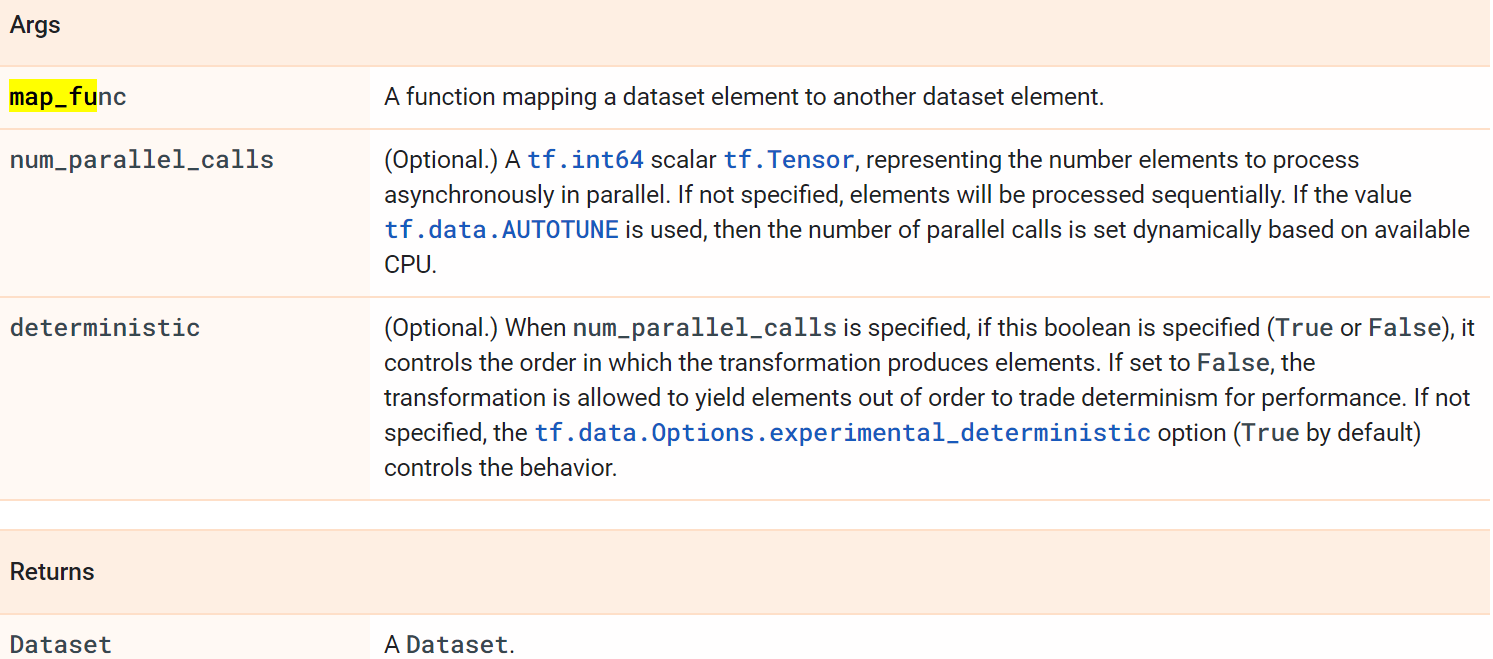

`map_func` can accept as arguments and return any type of dataset element.

Note that irrespective of the context in which map_func is defined (eager vs. graph), tf.data traces the function and executes it as a graph. To use Python code inside of the function you have a few options:

1) Rely on AutoGraph to convert Python code into an equivalent graph computation. The downside of this approach is that AutoGraph can convert some but not all Python code.

2) Use `tf.py_function` (https://www.tensorflow.org/api_docs/python/tf/py_function), which allows you to write arbitrary Python code but will generally result in worse performance than 1). For example:

In [ ]:
d = tf.data.Dataset.from_tensor_slices(['hello', 'world'])
# transform a string tensor to upper case string using a Python function
def upper_case_fn(t: tf.Tensor):
    return t.numpy().decode('utf-8').upper()
d = d.map(lambda x: tf.py_function(func=upper_case_fn,
          inp=[x], Tout=tf.string))
list(d.as_numpy_iterator())

3) Use `tf.numpy_function` (https://www.tensorflow.org/api_docs/python/tf/numpy_function), which also allows you to write arbitrary Python code. **Note that tf.py_function accepts tf.Tensor whereas tf.numpy_function accepts numpy arrays and returns only numpy arrays**. For example:

In [ ]:
d = tf.data.Dataset.from_tensor_slices(['hello', 'world'])
def upper_case_fn(t: np.ndarray):
    return t.decode('utf-8').upper()
d = d.map(lambda x: tf.numpy_function(func=upper_case_fn,
          inp=[x], Tout=tf.string))
list(d.as_numpy_iterator())

**Note that the use of `tf.numpy_function` and `tf.py_function` in general precludes the possibility of executing user-defined transformations in parallel (because of Python GIL).**

**Performance can often be improved by setting `num_parallel_calls` so that map will use multiple threads to process elements. If deterministic order isn't required, it can also improve performance to set deterministic=False**

The order of elements yielded by this transformation is deterministic if deterministic=True. If map_func contains stateful operations and num_parallel_calls > 1, the order in which that state is accessed is undefined, so the values of output elements may not be deterministic regardless of the deterministic flag value.

#### testing the above....

In [150]:
d = tf.data.Dataset.from_tensor_slices(['hello', 'world'])

for i in d:
    print(i)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)


In [160]:
res = tf.constant('hello', dtype=tf.string).numpy().decode('utf-8').upper()
type(res), res

(str, 'HELLO')

In [111]:
# Example 1
dataset = tf.data.Dataset.range(1, 6)
dataset = dataset.map(lambda x: x**2)
list(dataset.as_numpy_iterator())

[1, 4, 9, 16, 25]

In [123]:
# Example 2
dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4], [5, 6]])
# [1, 2], [3, 4], [5, 6] are the elements of this dataset
dataset = dataset.map(lambda list2d : [list2d[0]**2, list2d[1]**3]) 
list(dataset.as_numpy_iterator())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[(1, 8), (9, 64), (25, 216)]

In [117]:
# Example 3
dataset = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))
# (1,3,5) and (2,4,6) are the elements of this dataset
dataset = dataset.map(lambda x,y,z: (y**2, z**2)) # Project on the last 2 dimensions
list(dataset.as_numpy_iterator())

[(9, 25), (16, 36)]

In [125]:
# Example 4
dataset = tf.data.Dataset.from_tensor_slices({"a": [1, 2], "b": [3, 4]})
list(dataset.as_numpy_iterator())

[{'a': 1, 'b': 3}, {'a': 2, 'b': 4}]

In [126]:
dataset = dataset.map(lambda dict_: {'a': dict_['a']+3, 'b':dict_['b']+33} ) # Project on the last 2 dimensions
list(dataset.as_numpy_iterator())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[{'a': 4, 'b': 36}, {'a': 5, 'b': 37}]

In [129]:
elements = [(1, "foo"), (2, "bar"), (3, "baz")]
dataset = tf.data.Dataset.from_tensor_slices(elements)
list(dataset.as_numpy_iterator())

ValueError: Can't convert Python sequence with mixed types to Tensor.

In [128]:
elements = [(1, "foo"), (2, "bar"), (3, "baz")]
dataset = tf.data.Dataset.from_generator(lambda: elements, (tf.int32, tf.string))
list(dataset.as_numpy_iterator())

[(1, b'foo'), (2, b'bar'), (3, b'baz')]

In [ ]:
# `map_func` takes two arguments of type `tf.Tensor`. This function
# projects out just the first component.
result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

### `map` Example on a real dataset

In [ ]:
#!pip install keras-preprocessing

# Replace keras.engine
# with tensorflow.python.keras.engine

In [35]:
import tensorflow as tf

# from keras.engine import base_layer
# from keras.engine import base_preprocessing_layer

from tensorflow.python.keras.engine import base_layer
from tensorflow.python.keras.engine import base_preprocessing_layer

In [36]:
from tensorflow.python.keras.layers import Rescaling

normalization_layer = Rescaling(1./255) # [0,1] normalization
#normalization_layer = Rescaling(1./127.5, offset=-1)  # [-1,1] normalization

#normalization_layer = tf.keras.layers.Rescaling(1./255)
#tf.keras.layers.Rescaling(1./127.5, offset=-1)  # [-1,1] normalization

In [109]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [38]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [37]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
def map_fn(x,y)
    

In [7]:
normalized_ds_tr = train_ds.map(lambda x, y:(normalization_layer(x), y))
normalized_ds_val = val_ds.map(lambda x, y: (normalization_layer(x), y))

ModuleNotFoundError: No module named 'tensorflow.keras.layers.preprocessing'

In [10]:
import sys
[item for item in sys.modules.keys() if 'tensorflow' in item]

['tensorflow.python.platform',
 'tensorflow.python.platform.build_info',
 'tensorflow.python.platform.self_check',
 'tensorflow.python.pywrap_dlopen_global_flags',
 'tensorflow.python._pywrap_tensorflow_internal',
 'tensorflow.python.pywrap_tensorflow',
 'tensorflow.python.eager',
 'tensorflow.core',
 'tensorflow.core.framework',
 'tensorflow.core.framework.tensor_shape_pb2',
 'tensorflow.core.framework.types_pb2',
 'tensorflow.core.framework.resource_handle_pb2',
 'tensorflow.core.framework.tensor_pb2',
 'tensorflow.core.framework.attr_value_pb2',
 'tensorflow.core.framework.node_def_pb2',
 'tensorflow.core.framework.op_def_pb2',
 'tensorflow.core.framework.function_pb2',
 'tensorflow.core.protobuf',
 'tensorflow.core.framework.cost_graph_pb2',
 'tensorflow.core.framework.versions_pb2',
 'tensorflow.core.framework.graph_pb2',
 'tensorflow.core.framework.allocation_description_pb2',
 'tensorflow.core.framework.tensor_description_pb2',
 'tensorflow.core.framework.step_stats_pb2',
 'tens

### `prefetch(buffer_size)`


Creates a Dataset that prefetches elements from this dataset.

Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

**Note:** Like other Dataset methods, prefetch operates on the elements of the input dataset. It has no concept of examples vs. batches. `examples.prefetch(2)` will prefetch two elements (2 examples), while `examples.batch(20).prefetch(2)` will prefetch 2 elements (2 batches, of 20 examples each).

`Args:` buffer_size = A tf.int64 scalar tf.Tensor, representing the maximum number of elements that will be buffered when prefetching. If the value `tf.data.AUTOTUNE` is used, then the buffer size is dynamically tuned.

`Returns:` a Dataset

In [178]:
dataset = tf.data.Dataset.range(11)
dataset = dataset.prefetch(2)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [179]:
dataset = tf.data.Dataset.range(11)
dataset = dataset.batch(3).prefetch(2)
list(dataset.as_numpy_iterator())

[array([0, 1, 2], dtype=int64),
 array([3, 4, 5], dtype=int64),
 array([6, 7, 8], dtype=int64),
 array([ 9, 10], dtype=int64)]

### `reduce(initial_state, reduce_func)`

Reduces the input dataset to a single element.

The transformation calls reduce_func successively on every element of the input dataset until the dataset is exhausted, aggregating information in its internal state. The initial_state argument is used for the initial state and the final state is returned as the result.

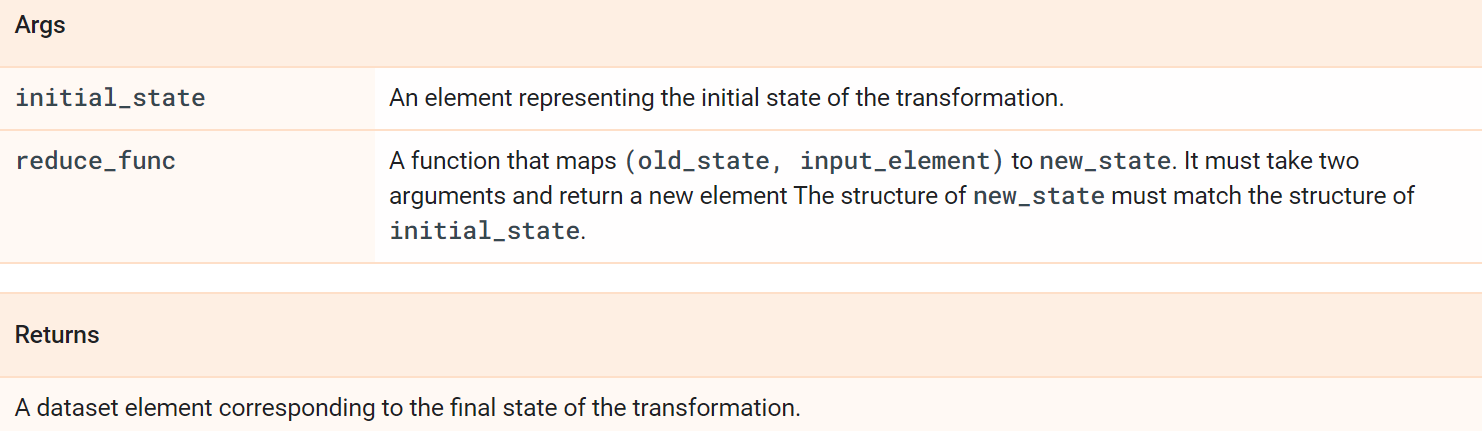

In [180]:
tf.data.Dataset.range(5).reduce(np.int64(2), lambda x, _: x + 1).numpy()

7

In [181]:
tf.data.Dataset.range(5).reduce(np.int64(3), lambda x, y: x + y).numpy()

13

### `repeat(count=None)`

In [182]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.repeat(3)
list(dataset.as_numpy_iterator())

[1, 2, 3, 1, 2, 3, 1, 2, 3]

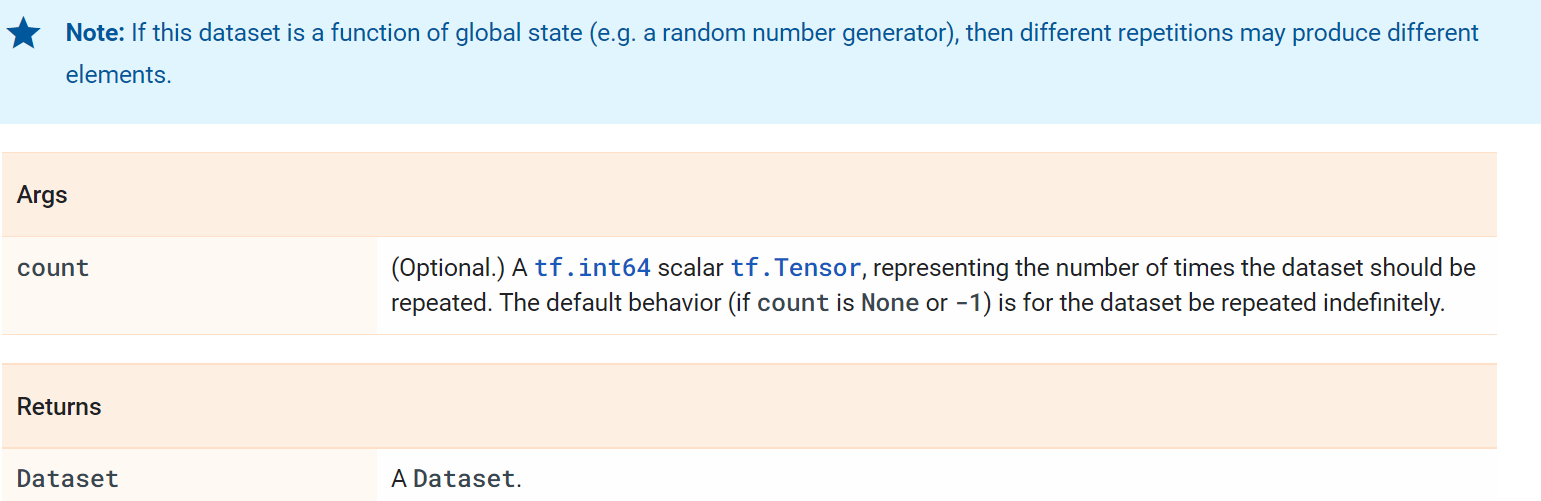

### `scan(initial_state, scan_func)`


A transformation that scans a function across an input dataset.

This transformation is a stateful relative of tf.data.Dataset.map. In addition to mapping scan_func across the elements of the input dataset, scan() accumulates one or more state tensors, whose initial values are initial_state

In [183]:
dataset = tf.data.Dataset.range(10)
initial_state = tf.constant(0, dtype=tf.int64)

scan_func = lambda state, i: (state + i, state + i)
dataset = dataset.scan(initial_state=initial_state, scan_func=scan_func)

list(dataset.as_numpy_iterator())

AttributeError: 'RangeDataset' object has no attribute 'scan'

### `shard(num_shards, index)`

In [184]:
A = tf.data.Dataset.range(10)
B = A.shard(num_shards=3, index=0)
list(B.as_numpy_iterator())

[0, 3, 6, 9]

In [185]:
C = A.shard(num_shards=3, index=1)
list(C.as_numpy_iterator())

[1, 4, 7]

In [186]:
D = A.shard(num_shards=3, index=2)
list(D.as_numpy_iterator())

[2, 5, 8]

This dataset operator is very useful when running distributed training, as it allows each worker to read a unique subset.

When reading a single input file, you can shard elements as follows:

In [ ]:
d = tf.data.TFRecordDataset(input_file)
d = d.shard(num_workers, worker_index)
d = d.repeat(num_epochs)
d = d.shuffle(shuffle_buffer_size)
d = d.map(parser_fn, num_parallel_calls=num_map_threads)

Important caveats:

- Be sure to shard before you use any randomizing operator (such as shuffle).
- Generally it is best if the shard operator is used early in the dataset pipeline. For example, when reading from a set of TFRecord files, shard before converting the dataset to input samples. This avoids reading every file on every worker. The following is an example of an efficient sharding strategy within a complete pipeline:

In [ ]:
d = Dataset.list_files(pattern)
d = d.shard(num_workers, worker_index)
d = d.repeat(num_epochs)
d = d.shuffle(shuffle_buffer_size)
d = d.interleave(tf.data.TFRecordDataset,
                 cycle_length=num_readers, block_length=1)
d = d.map(parser_fn, num_parallel_calls=num_map_threads)

### `shuffle(buffer_size)`

shuffle(
    buffer_size, seed=None, reshuffle_each_iteration=None
)

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

Randomly shuffles the elements of this dataset.

This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.

For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer.

reshuffle_each_iteration controls whether the shuffle order should be different for each epoch. In TF 1.X, the idiomatic way to create epochs was through the repeat transformation:

In [ ]:
dataset = tf.data.Dataset.range(3)
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
dataset = dataset.repeat(2)
# [1, 0, 2, 1, 2, 0]

dataset = tf.data.Dataset.range(3)
dataset = dataset.shuffle(3, reshuffle_each_iteration=False)
dataset = dataset.repeat(2)
# [1, 0, 2, 1, 0, 2]

In [ ]:
dataset = tf.data.Dataset.range(3)
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
list(dataset.as_numpy_iterator())
# [1, 0, 2]
list(dataset.as_numpy_iterator())
# [1, 2, 0]

### `skip(count)`

In [217]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.skip(7)
list(dataset.as_numpy_iterator())

[7, 8, 9]

### `take(count)`

In [219]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.take(3)
list(dataset.as_numpy_iterator())

[0, 1, 2]

In [218]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.take_while(lambda x: x < 5)
list(dataset.as_numpy_iterator())

AttributeError: 'RangeDataset' object has no attribute 'take_while'

### Visualize the dataset by converting to numpy

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator

### From https://www.tensorflow.org/guide/data

To create an input pipeline, you must start with a data source. For example, to construct a Dataset from data in memory, you can use tf.data.Dataset.from_tensors() or tf.data.Dataset.from_tensor_slices(). Alternatively, if your input data is stored in a file in the recommended TFRecord format, you can use tf.data.TFRecordDataset().

Once you have a Dataset object, you can transform it into a new Dataset by chaining method calls on the tf.data.Dataset object. For example, you can apply per-element transformations such as Dataset.map(), and multi-element transformations such as Dataset.batch(). See the documentation for tf.data.Dataset for a complete list of transformations.

The Dataset object is a Python iterable. This makes it possible to consume its elements using a for loop:

In [220]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

In [221]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


In [222]:
it = iter(dataset)

print(next(it).numpy())

8


The Python constructs that can be used to express the (nested) structure of elements include tuple, dict, NamedTuple, and OrderedDict. In particular, list is not a valid construct for expressing the structure of dataset elements. This is because early tf.data users felt strongly about list inputs (e.g. passed to tf.data.Dataset.from_tensors) being automatically packed as tensors and list outputs (e.g. return values of user-defined functions) being coerced into a tuple. As a consequence, if you would like a list input to be treated as a structure, you need to convert it into tuple and if you would like a list output to be a single component, then you need to explicitly pack it using tf.stack.

### `tf.data.Dataset.zip((dataset1, dataset2))`

In [16]:
dataset1 = tf.data.Dataset.from_tensor_slices([[1,2], [3,4], [5,6]])

dataset2 = tf.data.Dataset.from_tensor_slices(['A','B', 'C'])

dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

list(dataset3.as_numpy_iterator())

[(array([1, 2]), b'A'), (array([3, 4]), b'B'), (array([5, 6]), b'C')]

In [17]:
dataset3.element_spec

(TensorSpec(shape=(2,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

## YOTI

**(1)** Imagine you are given some data, consisting of the image data (X, in range [0, 255]), the labels (y) and an auxiliary attribute for each sample (w - we can think of this as the sample weight). Write some code to load this data into a model with a batch size of 32. You should normalize the input images (X) to be in the range [0, 1].

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X, y, w))

def normalization(img_tensor, y, w):
     return img_tensor/255, y, w

dataset = dataset.map(normalization)

**(2)** The above solution uses a lot of memory (because **from_tensor_slices will load the X image data into memory**), and so is only suitable for trivially simple models. Can you explain how to adapt it to stream the images, e.g. when working with a huge dataset? X is now filenames

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_filenames, y, w))

def normalization(img_filename, y, w):
    img_tensor = tf.io.read_file(img_filename)
    return img_tensor/255, y, w

dataset = dataset.map(normalization).shuffle().batch(32)

Y_batch = [0, 0, 0, 0, 1, 1, 1, 1]

Y_batch = [0, 1, 1, 1, 0 , 0, 0, 1]

**(3)** Now imagine that the labels (y) are binary, so 0 or 1. Can you describe how you’d ensure that each batch is precisely class-balanced, so that there is an equal number of the label-0 and label-1 samples per batch?

In [ ]:
Y_batch = [0, 0, 0, 0, 0, 1, 1, 1]

Y_0 = y[y == 0]  → X_0
Y_1 = y[y == 1]  → X_1

dataset1 = tf.data.Dataset.from_tensor_slices((X_0, Y_0, w))

dataset2 = tf.data.Dataset.from_tensor_slices((X_1, Y_1, w))

Dataset3 = dataset1.concatenate(dataset2)

## Stateful and Stateless objects in tensorflow

https://stackoverflow.com/questions/52636943/what-is-a-stateful-object-in-tensorflow

## PERFORMANCE

https://www.tensorflow.org/datasets/performances

https://www.tensorflow.org/guide/data

https://www.tensorflow.org/guide/data_performance

# DATA PERFORMANCE !!!!!!!!!

### From https://www.tensorflow.org/guide/data_performance

**The dataset**
Start with defining a class inheriting from tf.data.Dataset called ArtificialDataset. This dataset:

- Generates num_samples samples (default is 3)
- Sleeps for some time before the first item to simulate opening a file
- Sleeps for some time before producing each item to simulate reading data from a file

In [225]:
class ArtificialDataset(tf.data.Dataset):
    def _generator(num_samples):
        # Opening the file
        print('opening the file')
        time.sleep(0.03)

        for sample_idx in range(num_samples):
            # Reading data (line, record) from the file
            print('reading data from file and yielding it')
            time.sleep(0.015)

            yield (sample_idx,)

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )
    
    #Execution time: 0.25379803699615877

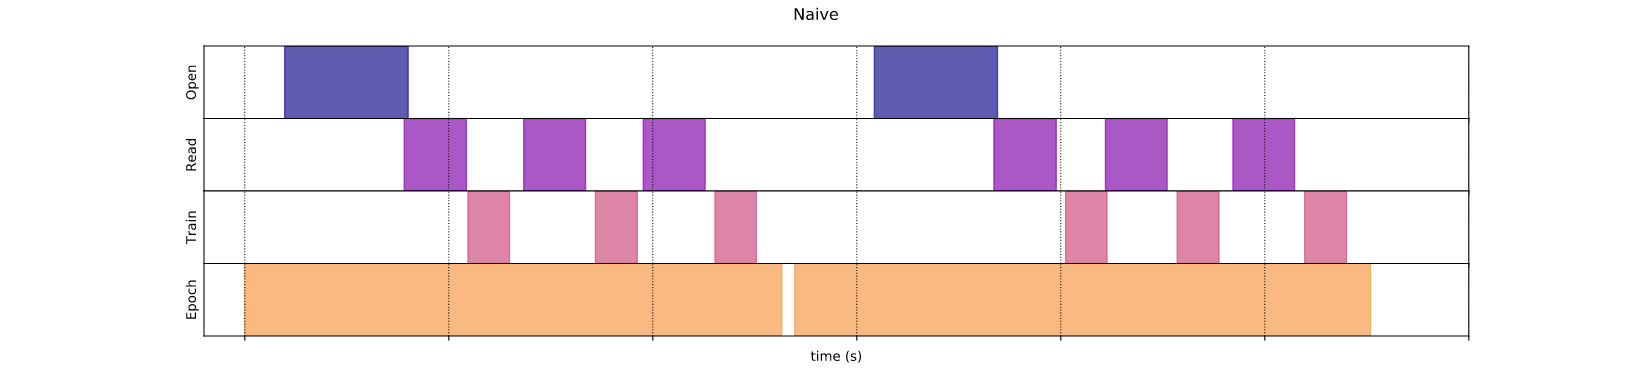

The plot shows that performing a training step involves:

- Opening a file if it hasn't been opened yet
- Fetching a data entry from the file
- Using the data for training

However, in a **naive synchronous implementation like here, while your pipeline is fetching the data, your model is sitting idle**. Conversely, **while your model is training, the input pipeline is sitting idle**. The **training step time is thus the SUM of opening, reading and training times**

In [235]:
import time

def benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    try:
        for epoch_num in range(num_epochs):
            print('Epoch:', epoch_num)
            for sample in dataset:
                # Performing a training step
                print('perform a train step')
                time.sleep(0.01)
        print("Execution time:", time.perf_counter() - start_time)
    except Exception as ex:
        print('Exception occurred:',ex)

In [236]:
benchmark(benchmark(ArtificialDataset()), num_epochs=2)

Epoch: 0
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Epoch: 1
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Execution time: 0.25379803699615877
Epoch: 0
Exception occurred: 'NoneType' object is not iterable


## 1. PREFETCHING!!!

**Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1.** Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

The tf.data API provides the `tf.data.Dataset.prefetch` (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) transformation. **It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested.** 

**The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step.** You could either manually tune this value, or set it to `tf.data.AUTOTUNE`(https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE), which will prompt the tf.data runtime to tune the value dynamically at runtime

**Note that the prefetch transformation provides benefits any time there is an opportunity to overlap the work of a "producer" with the work of a "consumer."**

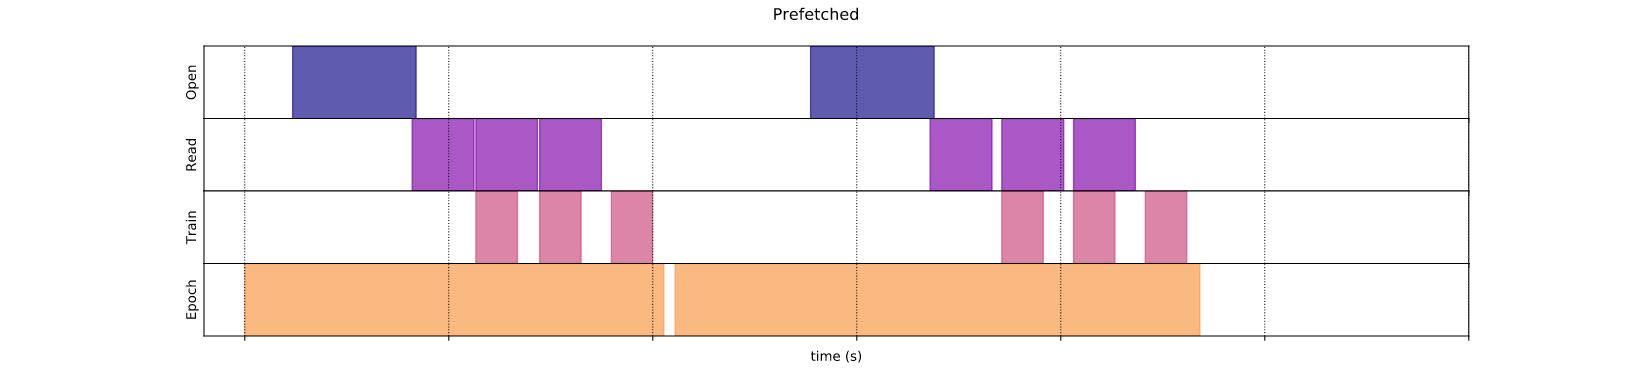

**Now, as the data execution time plot shows, while the training step is running for sample 0, the input pipeline is reading the data for the sample 1, and so on.**

In [240]:
benchmark(
    ArtificialDataset()
    .prefetch(tf.data.AUTOTUNE)
)

Epoch: 0
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
reading data from file and yielding itperform a train step

perform a train step
Epoch: 1
opening the file
reading data from file and yielding it
perform a train stepreading data from file and yielding it

perform a train stepreading data from file and yielding it

perform a train step
Execution time: 0.2165287309908308


### 2. Parallelizing data extraction

## !TODO! SHARDING AND INTERLEAVING !!!

In a real-world setting, the input data may be stored remotely (for example, on Google Cloud Storage or HDFS). A dataset pipeline that works well when reading data locally might become bottlenecked on I/O when reading data remotely because of the following differences between local and remote storage:

- **Time-to-first-byte**: **Reading the first byte of a file from remote storage can take orders of magnitude longer** than from local storage.
- **Read throughput**: While remote storage typically offers large aggregate bandwidth, **reading a single file might only be able to utilize a small fraction of this bandwidth**.
- In addition, **once the raw bytes are loaded into memory, it may also be necessary to deserialize and/or decrypt the data (e.g. protobuf https://developers.google.com/protocol-buffers/), which requires additional computation**. This overhead is present irrespective of whether the data is stored locally or remotely, but can be worse in the remote case if data is not prefetched effectively.

To mitigate the impact of the various data extraction overheads, the `tf.data.Dataset.interleave` (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#interleave) transformation can be used to parallelize the data loading step, interleaving the contents of other datasets (such as data file readers). The number of datasets to overlap can be specified by the cycle_length argument, while the level of parallelism can be specified by the num_parallel_calls argument. Similar to the prefetch transformation, the interleave transformation supports tf.data.AUTOTUNE, which will delegate the decision about what level of parallelism to use to the tf.data runtime.

**2A. Sequential interleave**

The default arguments of the tf.data.Dataset.interleave transformation make it interleave single samples from two datasets sequentially.

In [241]:
benchmark(
    tf.data.Dataset.range(2)
    .interleave(lambda _: ArtificialDataset())
)

Epoch: 0
opening the file
reading data from file and yielding it
perform a train step
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Epoch: 1
opening the file
reading data from file and yielding it
perform a train step
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Execution time: 0.4954659070062917


This data execution time plot allows to exhibit the behavior of the interleave transformation, fetching samples alternatively from the two datasets available. However, no performance improvement is involved here.

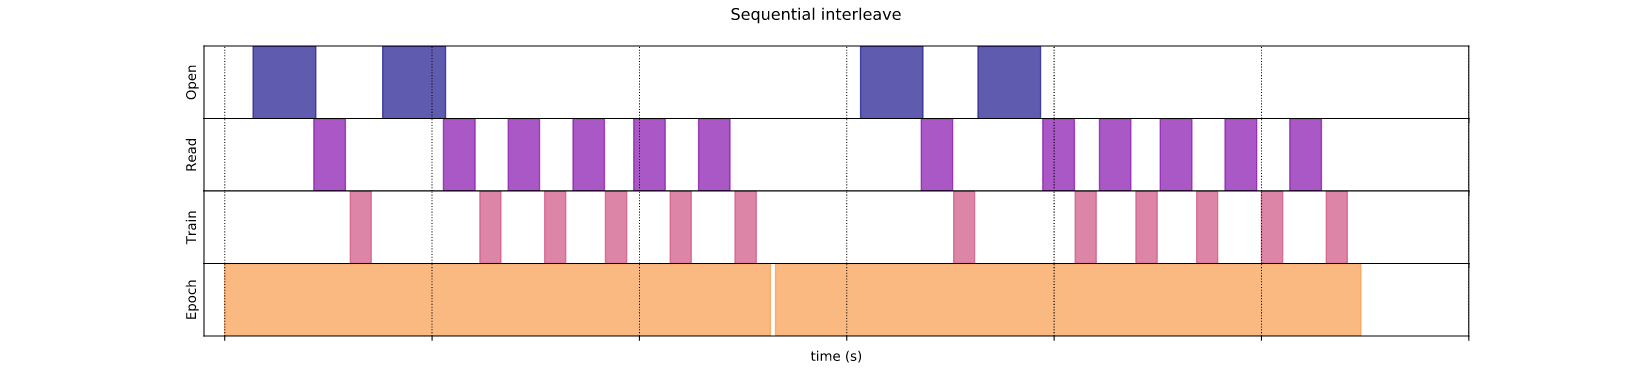

**2B. Parallel interleave**

Now, use the num_parallel_calls argument of the interleave transformation. This loads multiple datasets in parallel, reducing the time waiting for the files to be opened.

In [242]:
benchmark(
    tf.data.Dataset.range(2)
    .interleave(
        lambda _: ArtificialDataset(),
        num_parallel_calls=tf.data.AUTOTUNE
    )
)

Epoch: 0
opening the fileopening the file

reading data from file and yielding itreading data from file and yielding it

perform a train stepreading data from file and yielding it

reading data from file and yielding it
perform a train step
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a train step
perform a train step
perform a train step
Epoch: 1
opening the fileopening the file

reading data from file and yielding itreading data from file and yielding it

reading data from file and yielding itperform a train stepreading data from file and yielding it


perform a train step
reading data from file and yielding itreading data from file and yielding it

perform a train step
perform a train step
perform a train step
perform a train step
Execution time: 0.2974117570120143


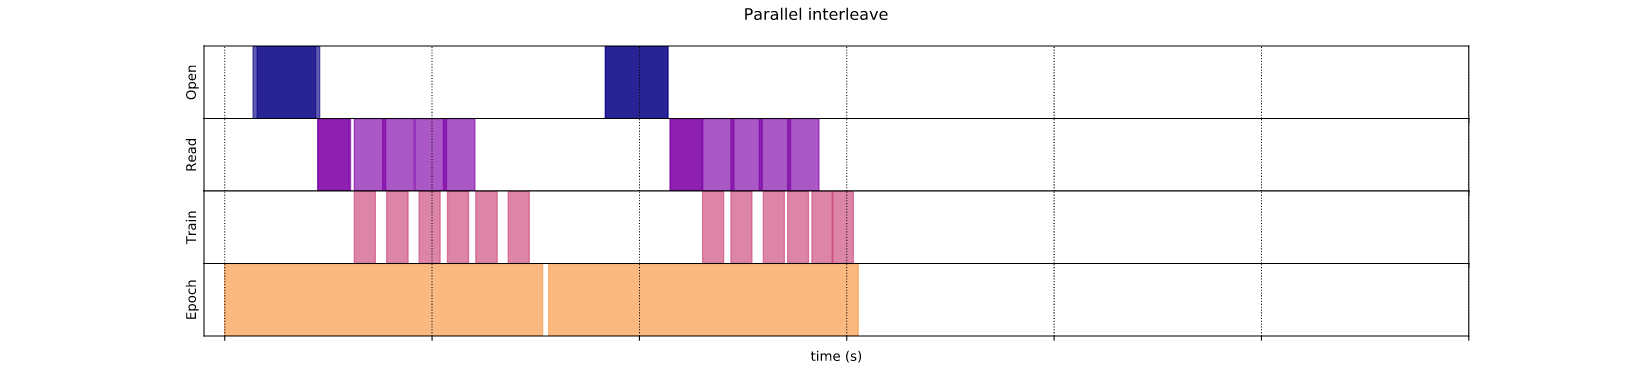

### 3. Parallelizing data transformation

When preparing data, input elements may need to be pre-processed. To this end, the tf.data API offers the `tf.data.Dataset.map` transformation, which applies a user-defined function to each element of the input dataset. Because input elements are independent of one another, the pre-processing can be parallelized across multiple CPU cores. To make this possible, similarly to the prefetch and interleave transformations, the map transformation provides the `num_parallel_calls` argument to specify the level of parallelism.

Choosing the best value for the num_parallel_calls argument depends on your hardware, characteristics of your training data (such as its size and shape), the cost of your map function, and what other processing is happening on the CPU at the same time. A simple heuristic is to use the number of available CPU cores. However, as for the prefetch and interleave transformation, the map transformation supports `tf.data.AUTOTUNE` which will delegate the decision about what level of parallelism to use to the tf.data runtime.

In [248]:
def mapped_function(s):
    # Do some hard pre-processing
    #print('hard pre-processing')
    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

**3A. Sequential mapping**

Start by using the map transformation without parallelism as a baseline example.

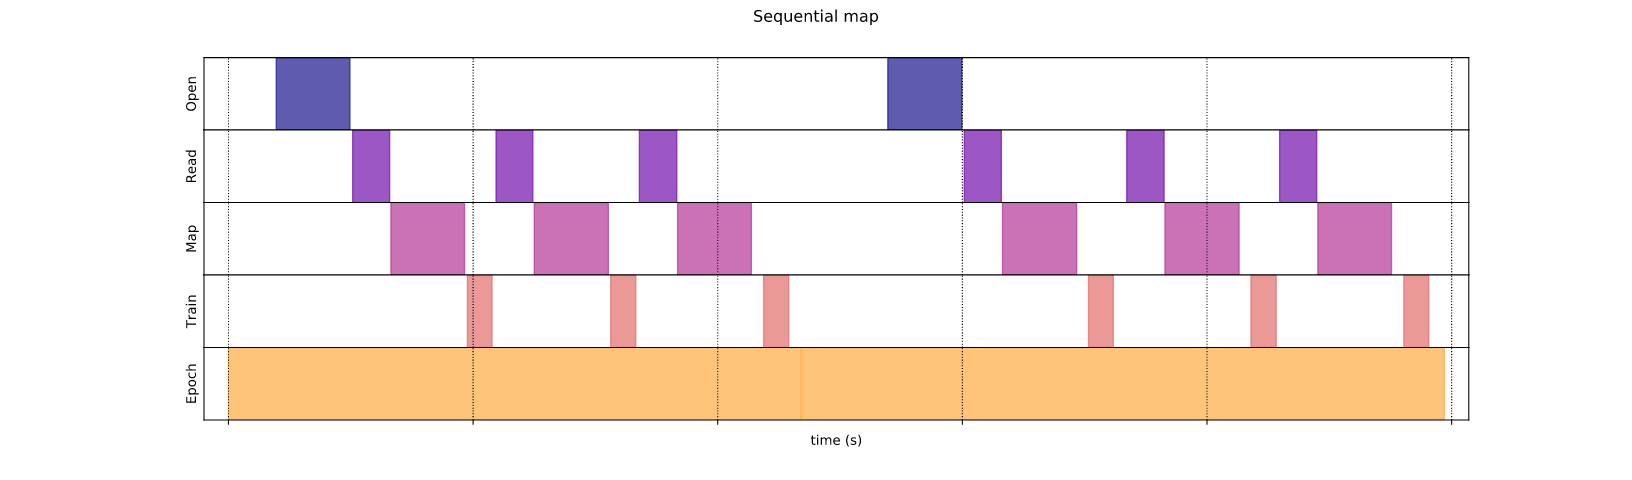

As for the naive approach, here, as the plot shows, the times spent for opening, reading, pre-processing (mapping) and training steps sum together for a single iteration.

In [249]:
benchmark(
    ArtificialDataset()
    .map(mapped_function)
)

Epoch: 0
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Epoch: 1
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Execution time: 0.4468946520064492


**3B. Parallel mapping**

Now, use the same pre-processing function but apply it in parallel on multiple samples.

In [251]:
benchmark(
    ArtificialDataset()
    .map(
        mapped_function,
        num_parallel_calls=tf.data.AUTOTUNE
    ),
    5
)

Epoch: 0
opening the file
reading data from file and yielding it
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a train step
perform a train step
Epoch: 1
opening the file
reading data from file and yielding it
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a train step
perform a train step
Epoch: 2
opening the file
reading data from file and yielding it
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a train step
perform a train step
Epoch: 3
opening the file
reading data from file and yielding it
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a train step
perform a train step
Epoch: 4
opening the file
reading data from file and yielding it
reading data from file and yielding it
reading data from file and yielding it
perform a train step
perform a tr

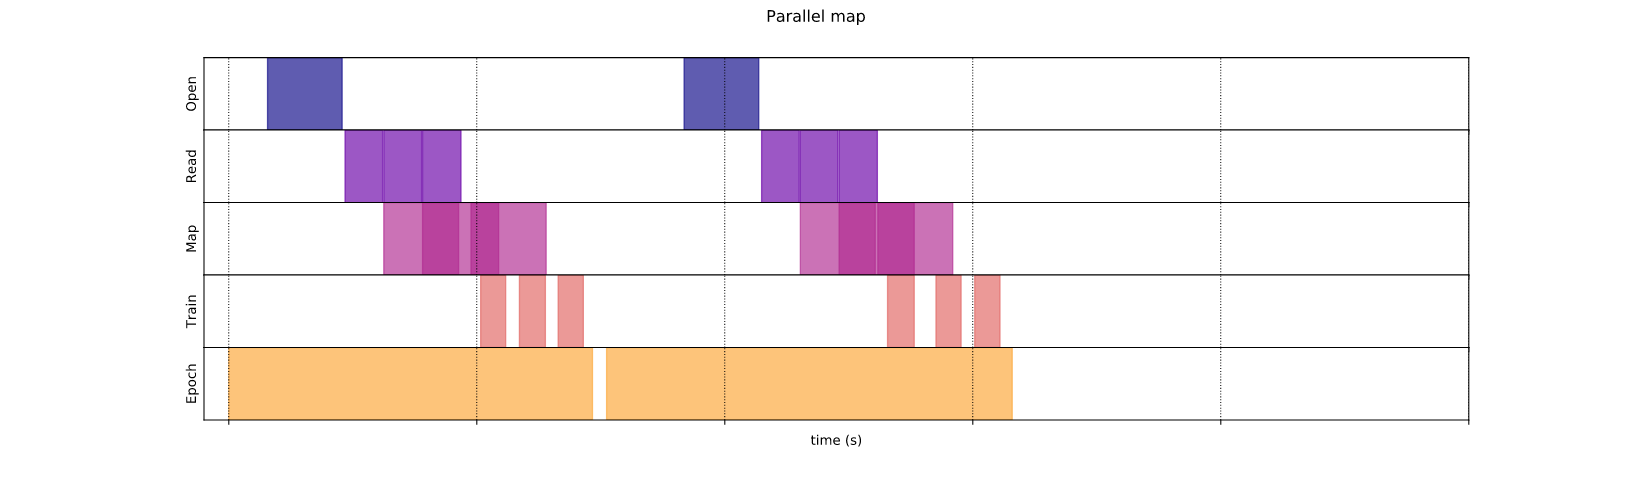

As the data plot demonstrates, the pre-processing steps overlap, reducing the overall time for a single iteration.

## 4. Caching

The `tf.data.Dataset.cache` (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) transformation can cache a dataset, either in memory or on local storage. This will save some operations (like file opening and data reading) from being executed during each epoch.

In [252]:
benchmark(
    ArtificialDataset()
    .map(  # Apply time consuming operations before cache
        mapped_function
    ).cache(),
    5
)

Epoch: 0
opening the file
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
reading data from file and yielding it
perform a train step
Epoch: 1
perform a train step
perform a train step
perform a train step
Epoch: 2
perform a train step
perform a train step
perform a train step
Epoch: 3
perform a train step
perform a train step
perform a train step
Epoch: 4
perform a train step
perform a train step
perform a train step
Execution time: 0.36620467399188783


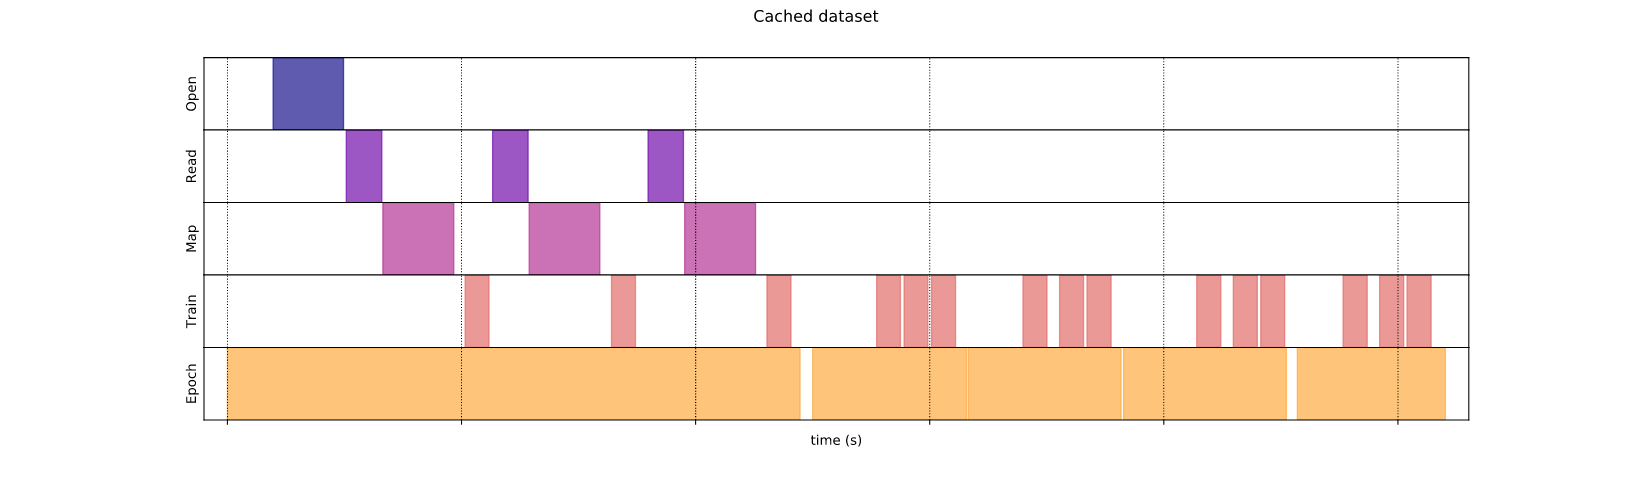

Here, the data execution time plot shows that **when you cache a dataset, the transformations before the cache one (like the file opening and data reading and maps like preprocessing) are executed only during the first epoch**. The next epochs will reuse the data cached by the `cache` transformation.

If the user-defined function passed into the map transformation is expensive, apply the cache transformation after the map transformation as long as the resulting dataset can still fit into memory or local storage. If the user-defined function increases the space required to store the dataset beyond the cache capacity, either apply it after the cache transformation or consider pre-processing your data before your training job to reduce resource usage.

### Caching partial computations
It is recommended to cache the dataset after the map transformation except if this transformation makes the data too big to fit in memory. A trade-off can be achieved if your mapped function can be split in two parts: a time consuming one and a memory consuming part. In this case, you can chain your transformations like below:

### 5.Vectorizing mapping
Invoking a user-defined function passed into the map transformation has overhead related to scheduling and executing the user-defined function. **Vectorize the user-defined function (that is, have it operate over a batch of inputs at once) and apply the batch transformation before the map transformation**.

To illustrate this good practice, your artificial dataset is not suitable. The scheduling delay is around 10 microseconds (10e-6 seconds), far less than the tens of milliseconds used in the ArtificialDataset, and thus its impact is hard to see.

For this example, use the base tf.data.Dataset.range function and simplify the training loop to its simplest form

In [ ]:
dataset.map(time_consuming_mapping).cache().map(memory_consuming_mapping)

This way, the time consuming part is only executed during the first epoch, and you avoid using too much cache space.

### 5a. Scalar mapping (not efficient - mapping is NOT vectorized)

In [253]:
fast_dataset = tf.data.Dataset.range(10000)

def fast_benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    for _ in tf.data.Dataset.range(num_epochs):
        for _ in dataset:
            pass
    tf.print("Execution time:", time.perf_counter() - start_time)

def increment(x):
    return x+1

In [254]:
fast_benchmark(
    fast_dataset
    # Apply function one item at a time
    .map(increment)
    # Batch
    .batch(256)
)

Execution time: 0.48593542899470776


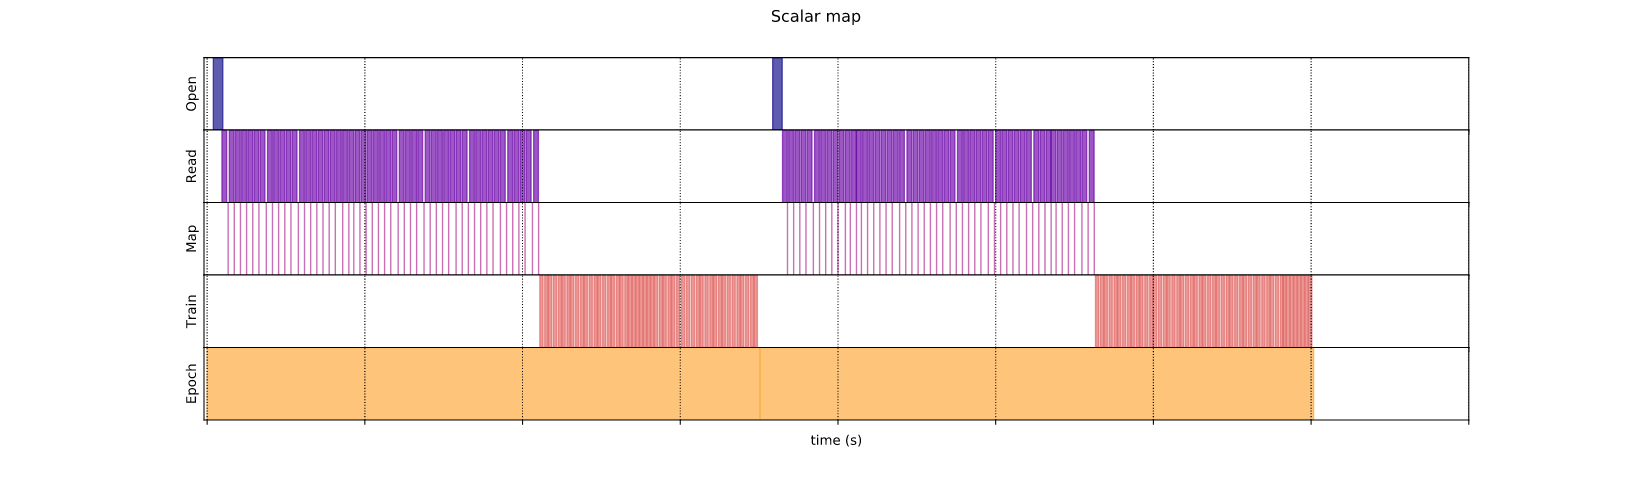

The plot above illustrates what is going on (with less samples) using the scalar mapping method. It shows that the mapped function is applied for each sample. While this function is very fast, it has some overhead that impact the time performance.

### 5b. Vectorized mapping

In [255]:
fast_benchmark(
    fast_dataset
    .batch(256)
    # Apply function on a batch of items
    # The tf.Tensor.__add__ method already handle batches
    .map(increment)
)

Execution time: 0.027679496997734532


This time, the mapped function is called once and applies to a batch of sample. As the data execution time plot shows, while the function could takes more time to execute, the overhead appear only once, improving the overall time performance.

## MOST MEMORY EFFICIENT WAY TO LOAD DATA

https://stackoverflow.com/questions/68594188/what-is-the-best-way-to-load-data-with-tf-data-dataset-in-memory-efficient-way

In [ ]:
#Manually

#First make a list of all the filenames in the dataset and a list of all the labels in the dataset.

filenames = ['abc.png', 'def.png', ...]
labels = [0, 1, ...]

#Then create dataset from tensor slices

dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
# BREAK .map() into 2 parts: Put time consuming mappings (preprocessing) 
# that do NOT involve randomness BEFORE the .cache() operation
dataset = dataset.map(TIME_INTENSIVE_FUNCTION_DETERMINISTIC, 
                      num_parallel_calls=PARALLEL_CALLS)

dataset = dataset.cache()

# Put memory consuming mappings that could have random behavior like 
# random crop, color, contrast etc. AFTER .cache()
dataset = dataset.map(MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
                      num_parallel_calls=PARALLEL_CALLS)

dataset = dataset.shuffle(len(filenames))
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.AUTOTUNE)

if you put cache() after the random map() then it will cache the first set of random decisions. Putting the cache() before the random map() should work as expected. (Note that this means you might want to split your map() into two parts, with the deterministic part before cache() and the random part after cache()

### My thoughts
- Normally we would like to `.batch()` after the `.shuffle()` operation. 
- Since `shuffle()` is random should be after the `.cache()` operation. `.cache()` will produce exactly the same elements during each iteration through the dataset. If you wish to randomize the iteration order, make sure to call `.shuffle()` after calling `.cache()`.
- At the end we always want to `.prefetch()` to 
- if mapping function is NOT vectorized then we lose time `.map()` will be applied on each sample independently. However, if we vectorize it we could apply `.batch()` before map.

**If you vectorize mapping function then it is better to call .batch() before .map(). Hence shuffle  →  batch  →  map**

In [ ]:
#Manually

#First make a list of all the filenames in the dataset and a list of all the labels in the dataset.

filenames = ['abc.png', 'def.png', ...]
labels = [0, 1, ...]

#Then create dataset from tensor slices

dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
# BREAK .map() into 2 parts: Put time consuming mappings (preprocessing) 
# that do NOT involve randomness BEFORE the .cache() operation
dataset = dataset.map(TIME_INTENSIVE_FUNCTION_DETERMINISTIC, 
                      num_parallel_calls=PARALLEL_CALLS)

dataset = dataset.cache()

dataset = dataset.shuffle(len(filenames))
dataset = dataset.batch(BATCH_SIZE)

# Put memory consuming mappings that could have random behavior like 
# random crop, color, contrast etc. AFTER .cache()
dataset = dataset.map(VECTORIZED_MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
                      num_parallel_calls=PARALLEL_CALLS)

dataset = dataset.prefetch(tf.data.AUTOTUNE)

## batch or shuffle first ???
https://stackoverflow.com/questions/50437234/tensorflow-dataset-shuffle-then-batch-or-batch-then-shuffle#:~:text=TL%3BDR%3A%20Yes%2C%20there,batch()%20.

In [ ]:
#Through a function

def dataset(csv, parse):
    filenames = []
    labels = []
    for i, row in csv.iterrows():
        filename = row[0]
        filenames.append(filename)
        label = row[1]
        labels.append(label)
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    labels = np_utils.to_categorical(labels)
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    dataset = dataset.map(TIME_INTENSIVE_FUNCTION_DETERMINISTIC, 
                      num_parallel_calls=PARALLEL_CALLS)
    dataset = dataset.cache()
    
#     dataset = dataset.shuffle(len(filenames))
#     dataset = dataset.batch(BATCH_SIZE)

#     # Put memory consuming mappings that could have random behavior like 
#     # random crop, color, contrast etc. AFTER .cache()
# dataset = dataset.map(VECTORIZED_MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
#                       num_parallel_calls=PARALLEL_CALLS)

    dataset = dataset.map(MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
                          num_parallel_calls=PARALLEL_CALLS)
    
    dataset = dataset.shuffle(len(filenames))
    dataset = dataset.batch(BATCH_SIZE)
    
    dataset = dataset.prefetch(tf.data.AUTOTUNE)  # or equal to number of batches
    return dataset

#Disclaimer: this method assumes csv is in (filenames, label) format

### From https://www.tensorflow.org/datasets/performances

### Important Notes: 
- Applying normalization before `ds.cache()` to re-use it.
- Random transformations (e.g. images augmentations) should be applied after both `ds.cache()` (to avoid caching randomness) and `ds.batch()` (for vectorization [1]).

In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


ds, ds_info = tfds.load(
    'mnist',
    split='train',
    as_supervised=True,  # returns `(img, label)` instead of dict(image=, ...)
    with_info=True,
)
# Applying normalization before `ds.cache()` to re-use it.
# Note: Random transformations (e.g. images augmentations) should be applied
# after both `ds.cache()` (to avoid caching randomness) and `ds.batch()` (for
# vectorization [1]).
ds = ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = ds.cache()

# dataset = dataset.shuffle(len(filenames))
# dataset = dataset.batch(BATCH_SIZE)

# # Put memory consuming mappings that could have random behavior like 
# # random crop, color, contrast etc. AFTER .cache()
# dataset = dataset.map(VECTORIZED_MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
#                       num_parallel_calls=PARALLEL_CALLS)

dataset = dataset.map(MEMORY_INTENSIVE_FUNCTION_RANDOMNESS, 
                      num_parallel_calls=PARALLEL_CALLS)

# For true randomness, we set the shuffle buffer to the full dataset size.
ds = ds.shuffle(ds_info.splits['train'].num_examples)
# Batch after shuffling to get unique batches at each epoch.
ds = ds.batch(128)
ds = ds.prefetch(tf.data.experimental.AUTOTUNE)


**Large datasets:**
- Large datasets are sharded (split in multiple files), and typically do not fit in memory so they should not be cached
- During training, it's important to shuffle the data well; poorly shuffled data can result in lower training accuracy. In addition to using ds.shuffle to shuffle records, you should also set shuffle_files=True to get good shuffling behavior for larger datasets that are sharded into multiple files. Otherwise, epochs will read the shards in the same order, and so data won't be truly randomized

In [ ]:
ds = tfds.load('imagenet2012', split='train', shuffle_files=True)

#### Auto-shard your data across workers (TF)

https://www.tensorflow.org/datasets/performances#auto-shard_your_data_across_workers_tf

Auto-shard your data across workers (Jax)

https://www.tensorflow.org/datasets/performances#auto-shard_your_data_across_workers_jax

#### Faster image decoding
https://www.tensorflow.org/datasets/performances#faster_image_decoding
    
#### Skip unused features
https://www.tensorflow.org/datasets/performances#skip_unused_features